In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'projects/'

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy
import warnings
warnings.filterwarnings('ignore')

In [0]:
path_spiral = Path(base_dir + 'spiral')
path_meander = Path(base_dir + 'meander')

# Spiral


In [0]:
# create train and validation set
np.random.seed(42)
data = ImageDataBunch.from_folder(path_spiral, train='.', valid_pct=0.2,
       ds_tfms= get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['healthy', 'parkinson']

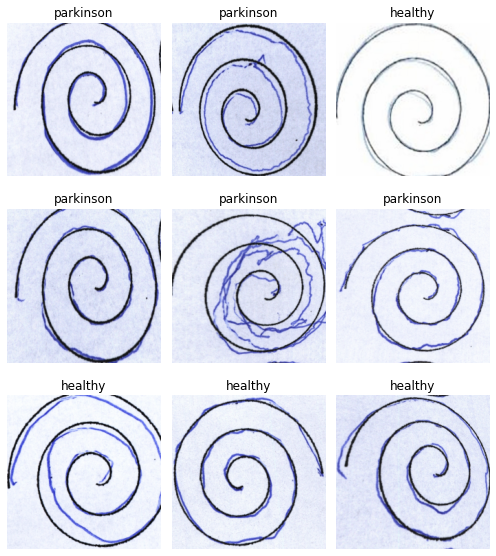

In [11]:
data.show_batch(rows=3, figsize=(7, 8))

In [12]:
# train on top of resnet34
learn_spiral = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [14]:
learn_spiral.fit_one_cycle(4) # lr is 1e-3 by default

epoch,train_loss,valid_loss,accuracy,time
0,1.188239,2.735121,0.500000,00:48
1,1.008944,2.563994,0.538462,00:07
2,0.978826,1.840784,0.692308,00:07
3,0.915576,1.124364,0.769231,00:07


In [0]:
learn_spiral.save('1')

In [0]:
# unfreeze the resenet layers
learn_spiral.unfreeze()

In [17]:
learn_spiral.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


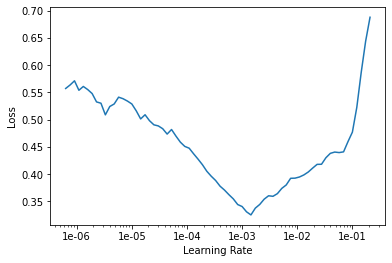

In [18]:
learn_spiral.recorder.plot()

In [20]:
learn_spiral.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.463926,0.913584,0.769231,00:07
1,0.419108,0.753359,0.788462,00:07


In [21]:
learn_spiral.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.251463,0.401222,0.942308,00:07
1,0.297769,0.346806,0.942308,00:07


In [0]:
learn_spiral.save('2')

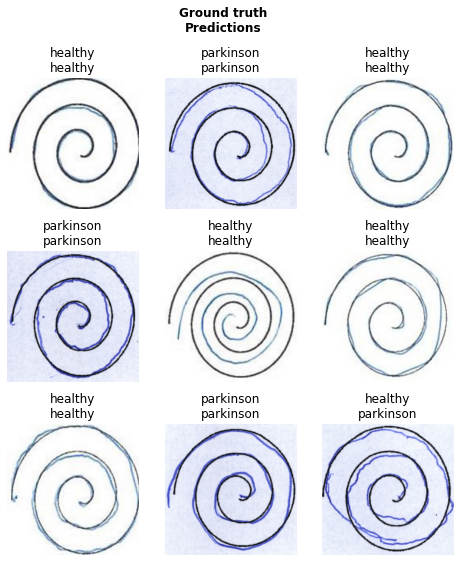

In [24]:
learn_spiral.show_results(rows=3, figsize=(8,9))

In [25]:
interp = ClassificationInterpretation.from_learner(learn_spiral)

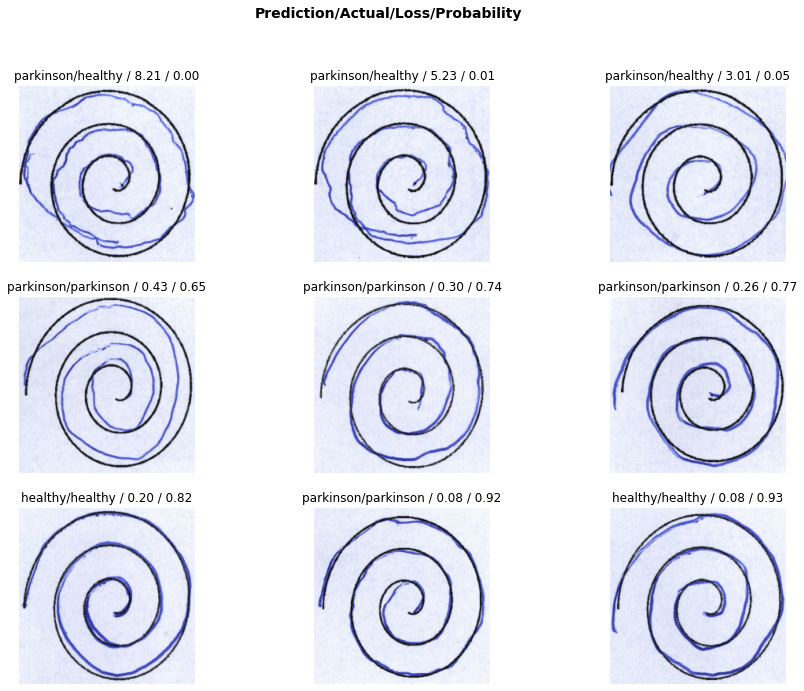

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

# Meander



In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path_meander, train='.', valid_pct=0.2,
       ds_tfms= get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

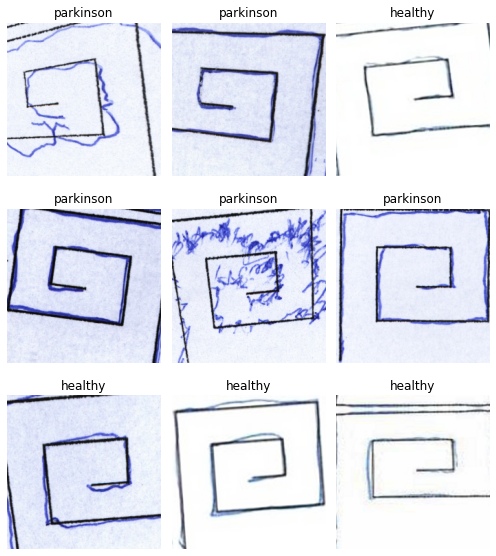

In [28]:
data.show_batch(rows=3, figsize=(7, 8))

In [0]:
learn_meander = cnn_learner(data, models.resnet34, metrics=accuracy)

In [32]:
learn_meander.fit_one_cycle(4) # lr is 1e-3 by default

epoch,train_loss,valid_loss,accuracy,time
0,1.044056,1.191450,0.692308,00:47
1,0.882706,1.242054,0.692308,00:07
2,0.789703,0.821356,0.750000,00:06
3,0.698602,0.687391,0.788462,00:06


In [0]:
learn_meander.save('m-1')

In [0]:
learn_meander.unfreeze()

In [35]:
learn_meander.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


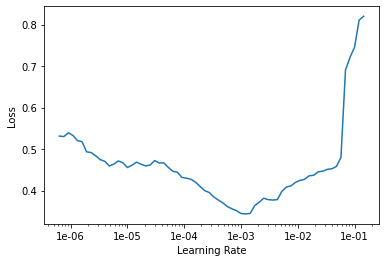

In [36]:
learn_meander.recorder.plot()

In [38]:
learn_meander.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.644091,0.472403,0.826923,00:06
1,0.551700,0.365715,0.846154,00:06
